In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
data_path = "wine.csv"
df = pd.read_csv(data_path)

In [2]:
# Display basic information and summary statistics
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Summary Statistics:
             Type     Alcohol       Malic         Ash  Alcalin

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


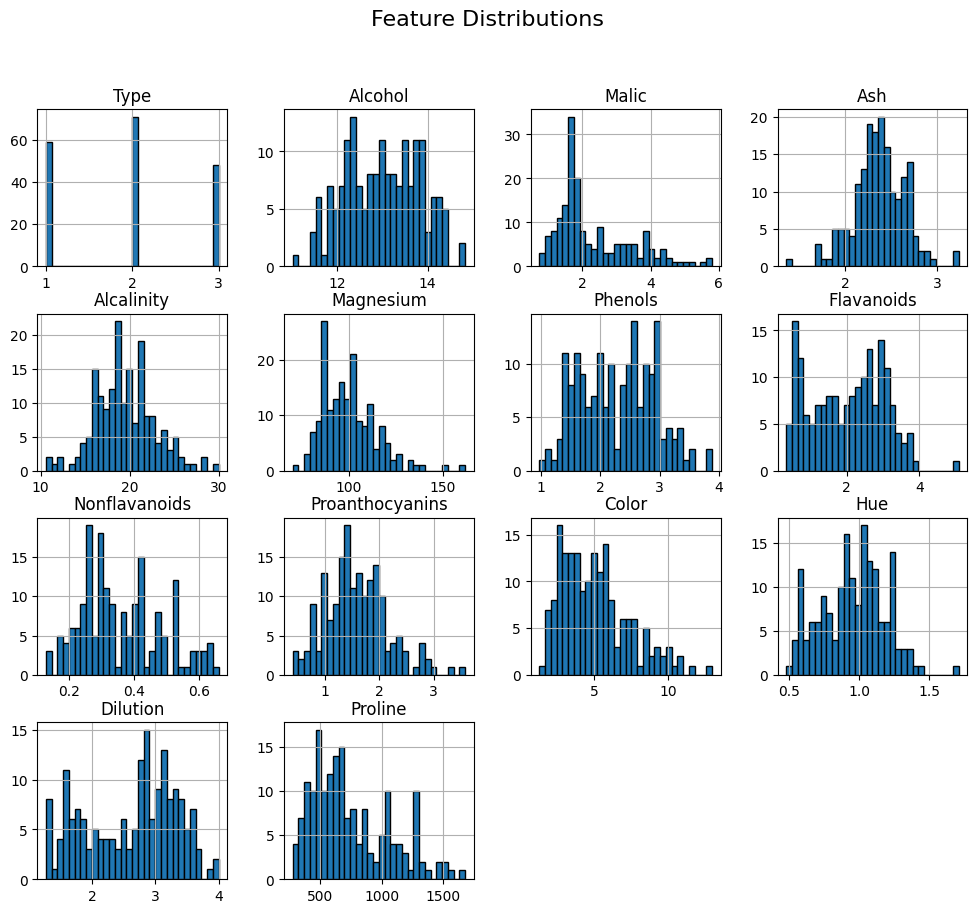

In [4]:
# Plot histograms for all numeric columns
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

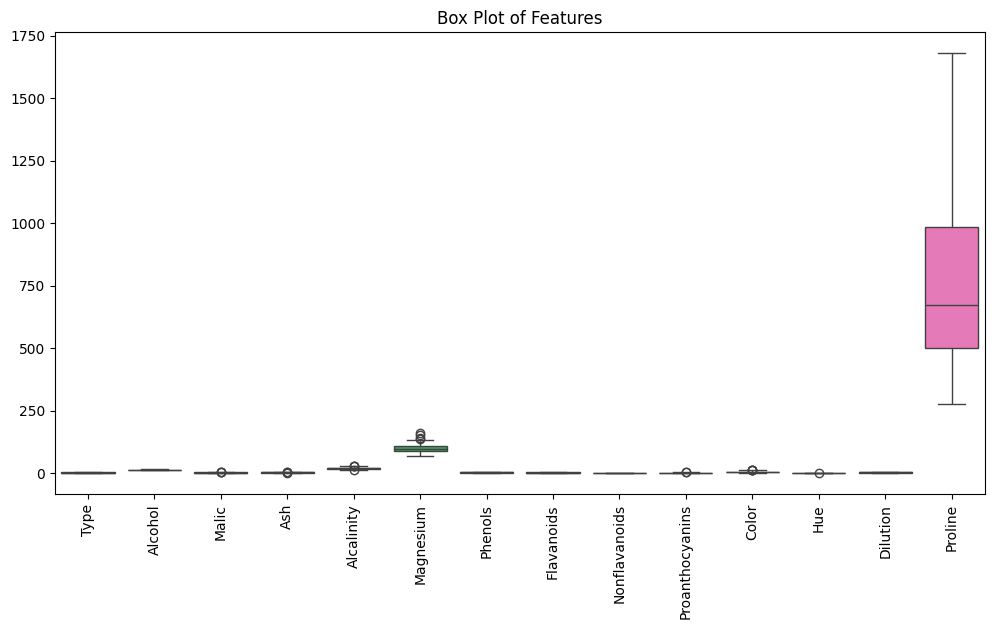

In [5]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()


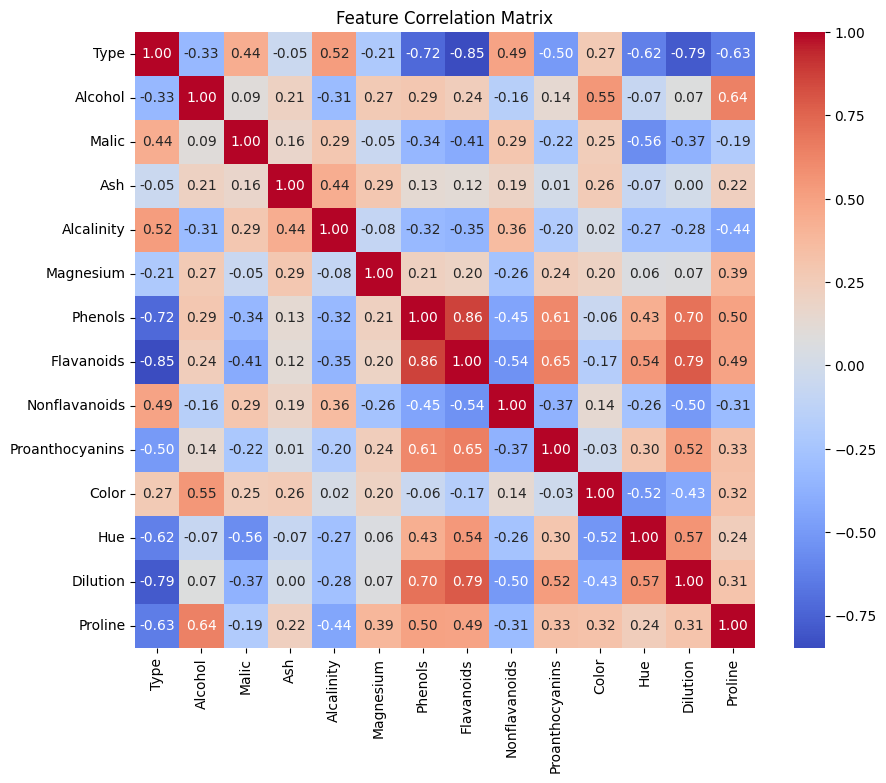

In [6]:
# Compute correlation matrix and visualize it
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [8]:
# Apply PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

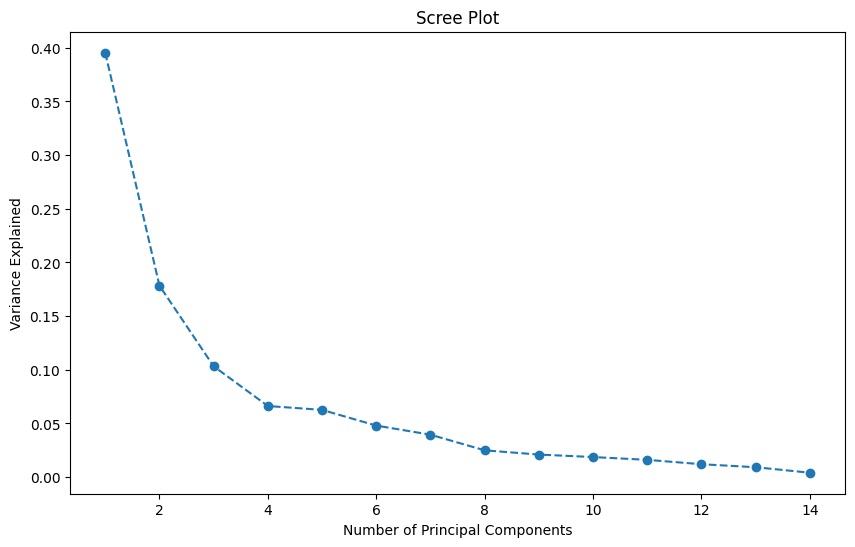

In [9]:
# Scree plot to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df.columns) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show()

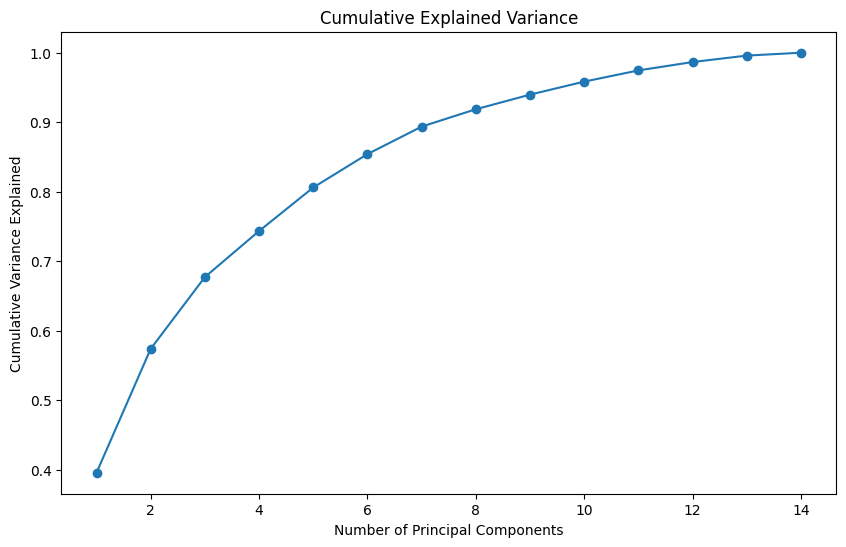

In [10]:
# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(df.columns) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Explained Variance")
plt.show()

In [11]:
# Transform data using optimal number of components (e.g., 2 for visualization)
pca_optimal = PCA(n_components=2)
df_pca = pca_optimal.fit_transform(df_scaled)

In [12]:
# Convert transformed data to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
print("\nTransformed Dataset with Principal Components:")
print(df_pca.head())


Transformed Dataset with Principal Components:
        PC1       PC2
0 -3.522934  1.453098
1 -2.528858 -0.330019
2 -2.785029  1.036936
3 -3.922588  2.768210
4 -1.407511  0.867773


In [13]:
# Apply K-means clustering to original data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

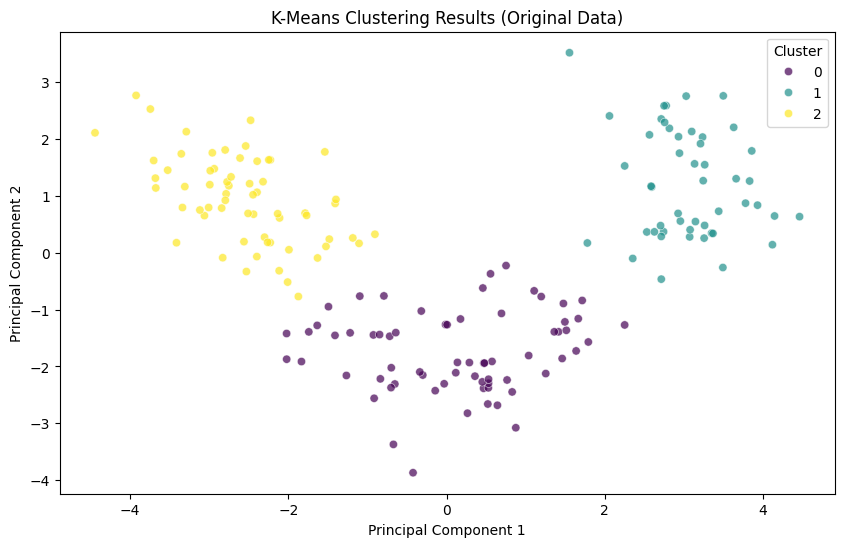

In [14]:
# Visualize clustering results for original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=clusters, palette='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Results (Original Data)")
plt.legend(title="Cluster")
plt.show()

In [15]:
# Evaluate clustering performance for original data
silhouette_avg = silhouette_score(df_scaled, clusters)
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
print(f"\nSilhouette Score (Original Data): {silhouette_avg}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin}")


Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [16]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)
df_pca['Cluster'] = clusters_pca


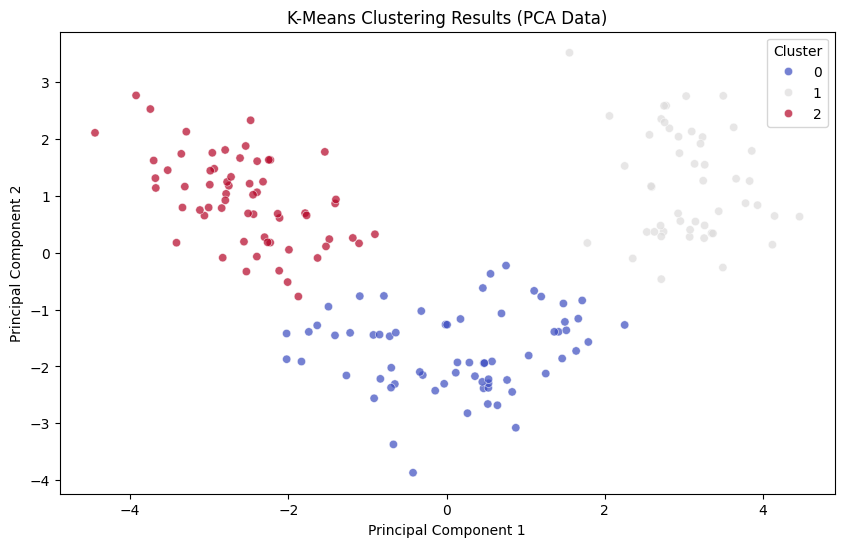

In [17]:
# Visualize clustering results for PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=clusters_pca, palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Results (PCA Data)")
plt.legend(title="Cluster")
plt.show()

In [18]:
silhouette_avg_pca = silhouette_score(df_pca[['PC1', 'PC2']], clusters_pca)
davies_bouldin_pca = davies_bouldin_score(df_pca[['PC1', 'PC2']], clusters_pca)
print(f"\nSilhouette Score (PCA Data): {silhouette_avg_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")


Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575713


In [19]:
# Compare clustering results
print("\nComparison of Clustering Results:")
print(f"Silhouette Score - Original Data: {silhouette_avg}, PCA Data: {silhouette_avg_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin}, PCA Data: {davies_bouldin_pca}")



Comparison of Clustering Results:
Silhouette Score - Original Data: 0.30648398324833453, PCA Data: 0.6024415520362845
Davies-Bouldin Index - Original Data: 1.315707552261773, PCA Data: 0.5397078562575713


In [20]:
# Discussion on impact of PCA on clustering
print("\nAnalysis and Insights:")
print("1. The clustering performance on the original dataset and PCA-transformed data can be compared using Silhouette Score and Davies-Bouldin Index.")
print("2. PCA reduces the dimensionality while preserving most of the variance, potentially improving clustering performance.")
print("3. If clustering performance degrades after PCA, it indicates that some important variance was lost.")
print("4. PCA can help visualize clustering results in 2D, making it useful for interpretability.")
print("5. Trade-offs exist: PCA simplifies data but may remove subtle distinctions needed for effective clustering.")



Analysis and Insights:
1. The clustering performance on the original dataset and PCA-transformed data can be compared using Silhouette Score and Davies-Bouldin Index.
2. PCA reduces the dimensionality while preserving most of the variance, potentially improving clustering performance.
3. If clustering performance degrades after PCA, it indicates that some important variance was lost.
4. PCA can help visualize clustering results in 2D, making it useful for interpretability.
5. Trade-offs exist: PCA simplifies data but may remove subtle distinctions needed for effective clustering.


In [21]:
# Conclusion and Insights
print("\nConclusion and Insights:")
print("1. Key Findings: PCA effectively reduces dimensionality, potentially improving clustering performance, but it may also remove critical variance.")
print("2. Practical Implications: PCA is useful for visualization and reducing noise, while clustering helps in segmentation and pattern discovery.")
print("3. Recommendations: Use PCA when dealing with high-dimensional data, but evaluate its impact before applying clustering directly on reduced dimensions.")



Conclusion and Insights:
1. Key Findings: PCA effectively reduces dimensionality, potentially improving clustering performance, but it may also remove critical variance.
2. Practical Implications: PCA is useful for visualization and reducing noise, while clustering helps in segmentation and pattern discovery.
3. Recommendations: Use PCA when dealing with high-dimensional data, but evaluate its impact before applying clustering directly on reduced dimensions.
